In [1]:
import numpy as np
from importlib import reload
from scipy import signal

import plotting_tools as pt
import utils
import dsi
utils = reload(utils)
pt = reload(pt)
dsi = reload(dsi)

import pickle
import sys
# Notebook needs to see the RKLM_Python module to load pickled class instances
sys.path.append('../RKLM_Python/')

from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt

In [2]:
Nx, Ny = 301, 10
N = 1

def load(Nx,Ny,et):
    base_fn = 'output_lamb_wave'
    pydir = '../%s/' %base_fn

    tc = utils.test_case(base_fn, pydir, Nx, Ny, et)
    tags = tc.get_tag_dict()
    
    return tc, tags

i2 = (slice(2,-2),slice(2,-2))

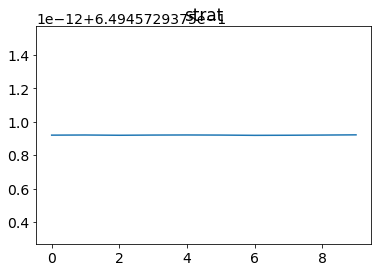

/home/ray/git-projects/RKLM_Reference/visualiser_debugger/plotting_tools.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.arr_lst = np.array(arr_lst)


(11, 302)
(11, 302)
(11, 302)
(11, 302)
(11, 302)
(11, 302)
(11, 302)
(11, 302)
(11, 302)
(11, 302)
(11, 302)
(11, 302)
(11, 302)
(11, 302)
(11, 302)
(11, 302)


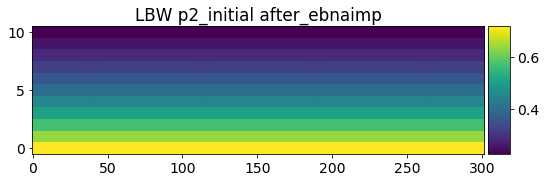

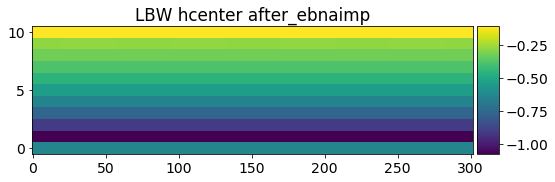

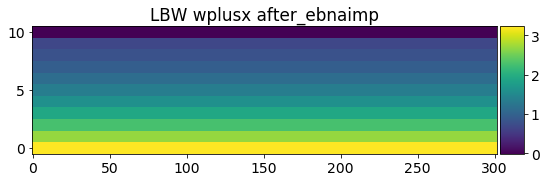

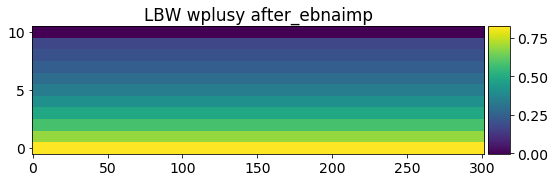

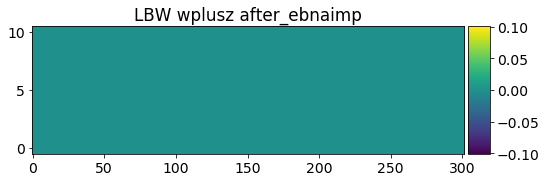

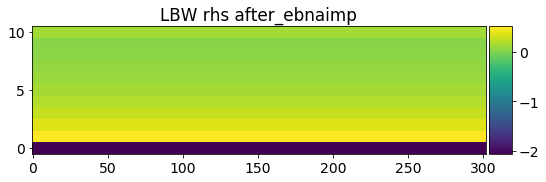

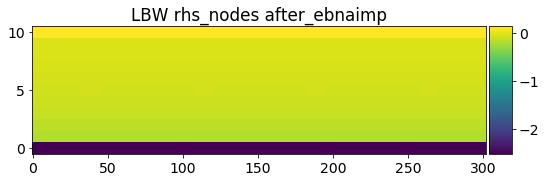

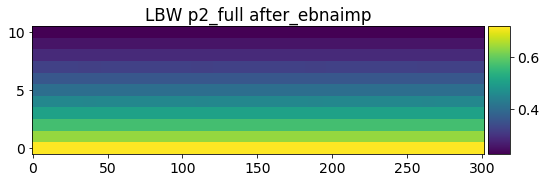

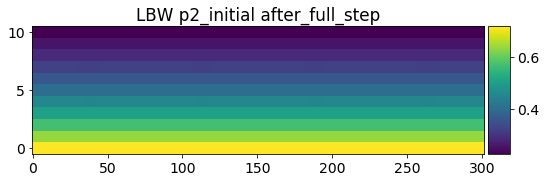

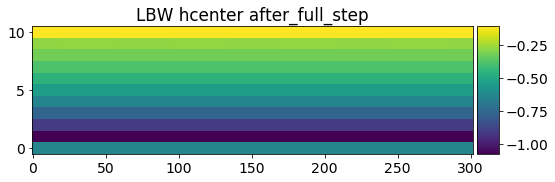

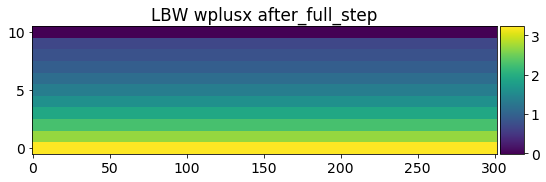

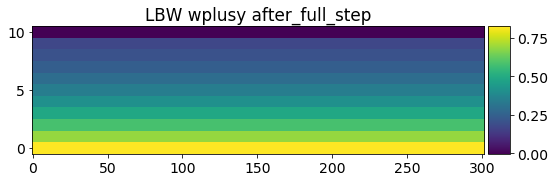

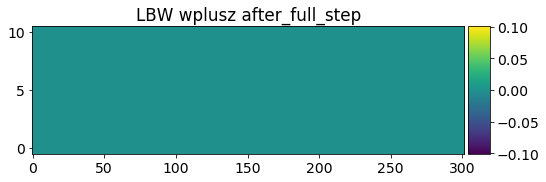

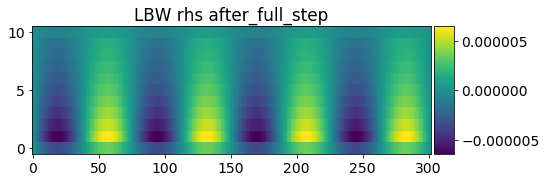

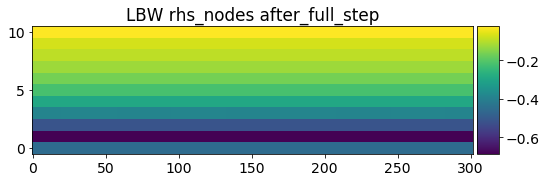

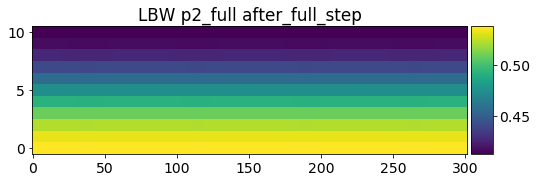

In [8]:
l_typ = 'WINDOW_STEP'
diff = False
attr_labels = pt.labels()

def get_ens(tc, tag, times, sfx , diff, attribute):
#     idx = 0 if tag is 'ic' else 1
    idx = 0
    ens = tc.get_ensemble(times, N, attribute, sfx, label_type=l_typ, avg=True, diff=diff, tag=tag, inner=False, load_ic=False)[idx]
    label = sfx + '_' + attribute
    return label, ens.T

sfx1 = 'debug_ic'
et = 195.0

tc, tags = load(Nx,Ny,et)
debug_attrs = tc.get_debug_attrs()
times = [0]

# load pickled instances of data used in simulation
fn_pickle = tc.get_filename(N,sfx1,format='dat')
path_pickle = tc.get_path(fn_pickle)

file = open(path_pickle,'rb')
ud = pickle.load(file)
mpv = pickle.load(file)
dap = pickle.load(file)
elem = pickle.load(file)
file.close()

S0 = (ud.stratification(elem.y)).reshape(-1,1)
igs = elem.igs
dim = 1
is_periodic = False
y_idx = slice(igs[dim]-is_periodic,-igs[dim]+is_periodic-1)
right_idx = None if -igs[dim]+is_periodic == 0 else -igs[dim]+is_periodic
y_idx1 = slice(igs[dim]-is_periodic+1, right_idx) 
strat = 2.0 * (mpv.HydroState_n.Y0[y_idx1] - mpv.HydroState_n.Y0[y_idx]) / (mpv.HydroState_n.Y0[y_idx1] + mpv.HydroState_n.Y0[y_idx]) / elem.dy

plt.figure()
plt.plot(strat)
plt.title('strat')
plt.show()

if times[0] == 0:
    ic_dict = {-1:'ic'}
    ic_dict.update(tags)
    tags = ic_dict
    
for tag in tags.values():
    if tag == 'after_ebnaimp' or tag == 'after_full_step':
        for attribute in debug_attrs.values():
            _, a1 = get_ens(tc, tag, times, sfx1, diff, attribute)

            la = 'LBW %s %s' %(attribute,tag)
            aa = a1
            aa = aa[i2]

            ll = [aa, la]
            pl_lst = [ll]
            line = aa[:,151]        

            pl = pt.plotter(pl_lst,ncols=1,figsize=(8,3),sharey=False)
            _ = pl.plot(method='imshow')
            print(aa.shape)
            
#             plt.figure()
#             plt.plot(line)
#             plt.show()

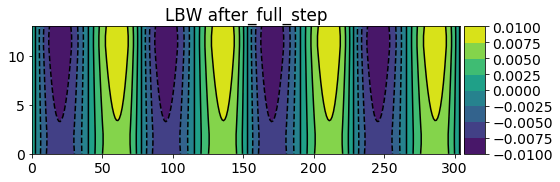

In [10]:
l_typ = 'WINDOW_STEP'
diff = False
attr_labels = pt.labels()

et = 195.0
et = 200.0
et = 8000.0
# l_typ = 'TIME'
# times = [6000.0]
times = [600]

def get_ens(tc, times, sfx , diff, attribute):
    idx = 0 if tag is 'ic' else 1
    ens = tc.get_ensemble(times, N, attribute, sfx, label_type=l_typ, avg=True, diff=diff, tag=tag, inner=False)[idx]

    label = sfx + '_' + attribute
    return label, ens.T

sfx1 = 'debug_ic'
# et = 195.0

tc, tags = load(Nx,Ny,et)
debug_attrs = tc.get_debug_attrs()
# times = [112]

# load pickled instances of data used in simulation
fn_pickle = tc.get_filename(N,sfx1,format='dat')
path_pickle = tc.get_path(fn_pickle)

file = open(path_pickle,'rb')
ud = pickle.load(file)
mpv = pickle.load(file)
dap = pickle.load(file)
elem = pickle.load(file)
file.close()

S0 = (ud.stratification(elem.y)).reshape(-1,1)

if times[0] == 0:
    ic_dict = {-1:'ic'}
    ic_dict.update(tags)
    tags = ic_dict
    
# for tag in tags.values():        
for tag in [tags[9]]:
    attribute = 'rho'
    _, a1 = get_ens(tc, times, sfx1, diff, attribute)
    attribute = 'rhou'
    _, a2 = get_ens(tc, times, sfx1, diff, attribute)
    attribute = 'rhoY'
    _, a3 = get_ens(tc, times, sfx1, diff, attribute)
    attribute = 'p2_nodes'
    _, a4 = get_ens(tc, times, sfx1, diff, attribute)
    
    la = 'LBW %s' %tag
    aa = a2 / a1
#     a3 = a3[i2]
#     a2 = a2[i2]
#     a1 = a1[i2]
#     aa = a3 / a1 * a3
#     aa = a3
#     cexp = 0.6
#     ccenter = -1.2684140000000002
#     aa = ccenter*aa**cexp
#     aa = a2 / a1
    line = aa[:,151]
#     line = 0.5*(line[1:] + line[:-1])
#     line = ccenter*line**cexp
#         aa = a3/a1 * a2 - a1
#         aa = a3 / a1
#         aa = aa[i2]
    sigma = 0.78
    # aa = gaussian_filter(aa, sigma)

    ll = [aa, la]
    pl_lst = [ll]

    pl = pt.plotter(pl_lst,ncols=1,figsize=(8,3),sharey=False)
    _ = pl.plot(method='contour')
    
#     plt.figure()
#     plt.plot(line)
#     plt.show()


# IGW debug cell

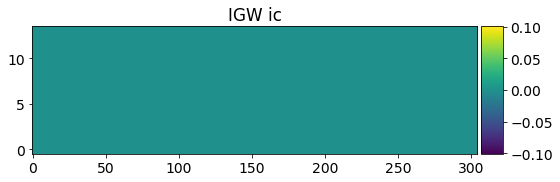

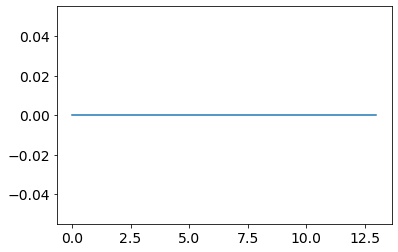

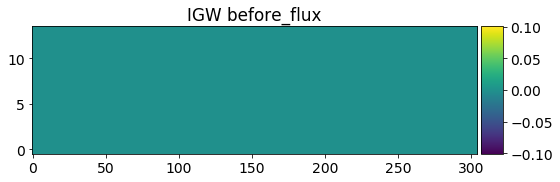

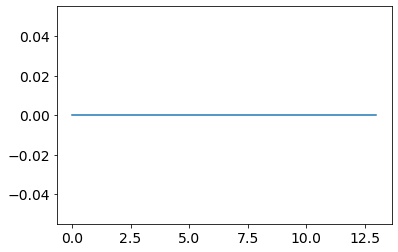

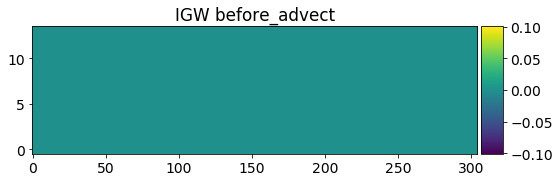

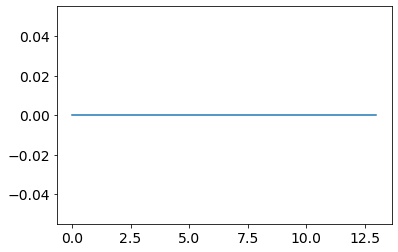

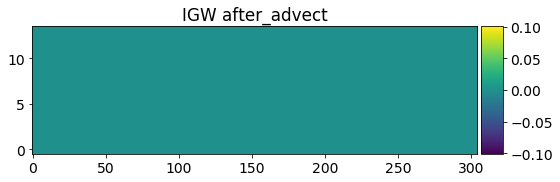

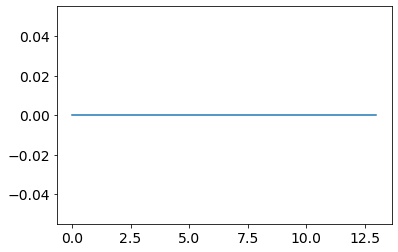

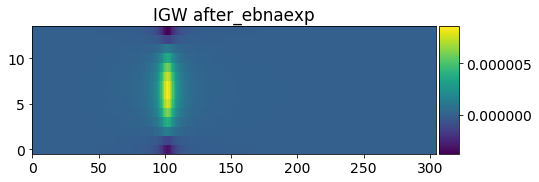

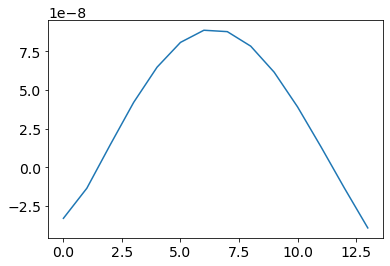

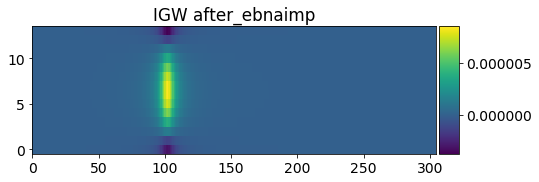

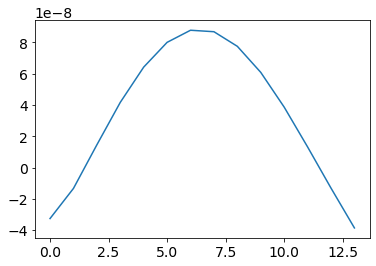

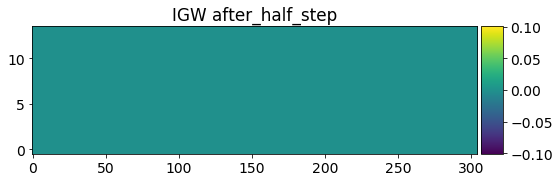

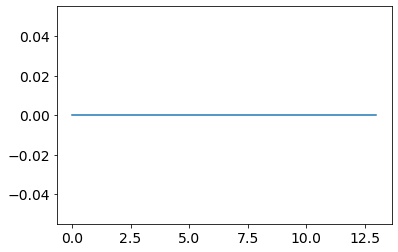

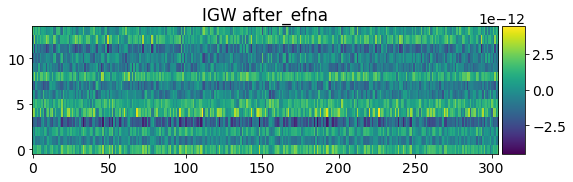

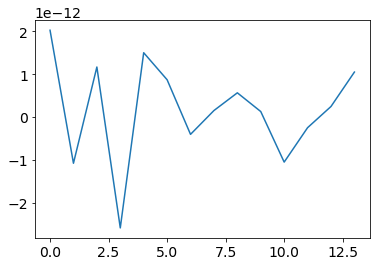

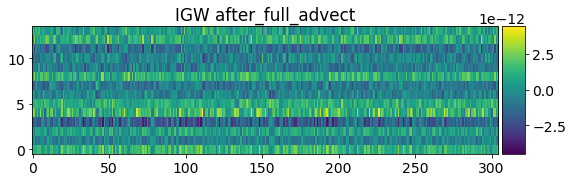

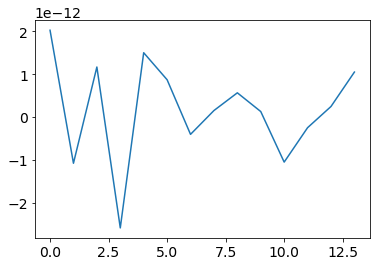

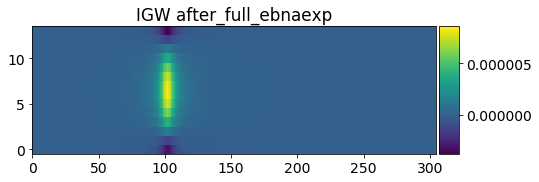

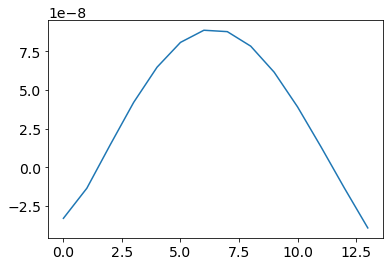

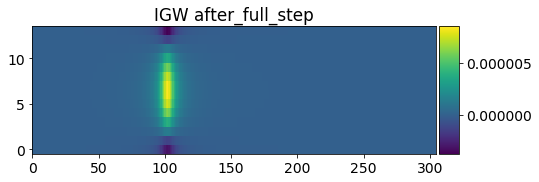

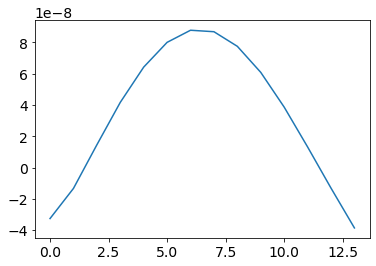

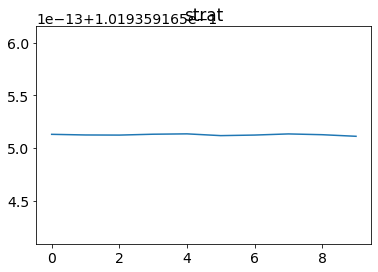

(11, 302)


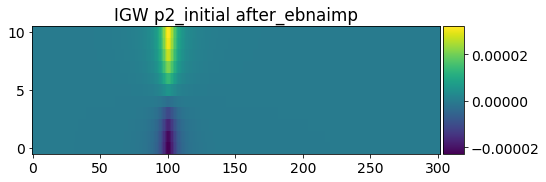

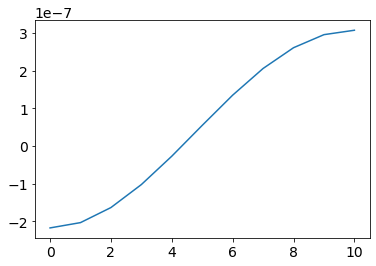

(11, 302)


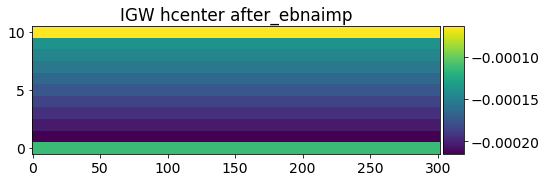

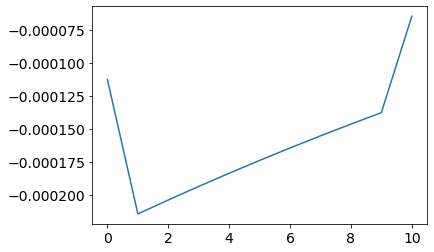

(11, 302)


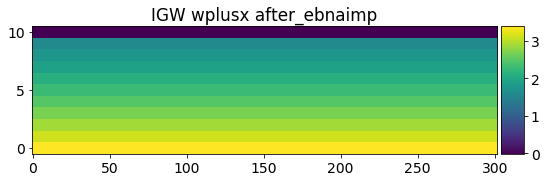

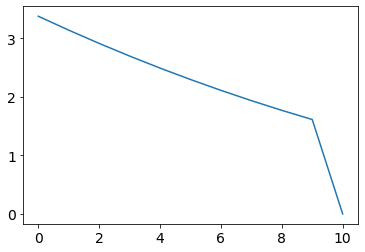

(11, 302)


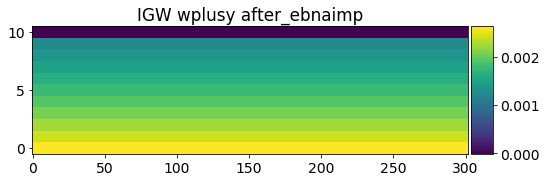

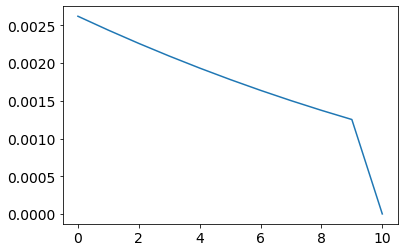

(11, 302)


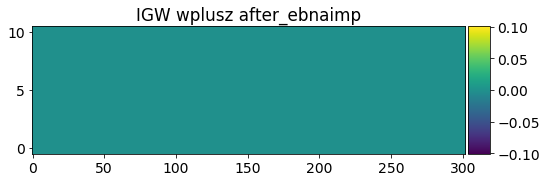

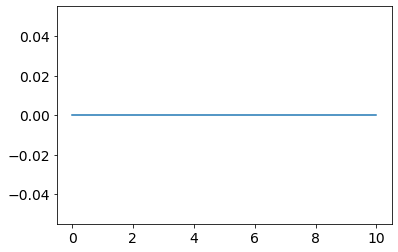

(11, 302)


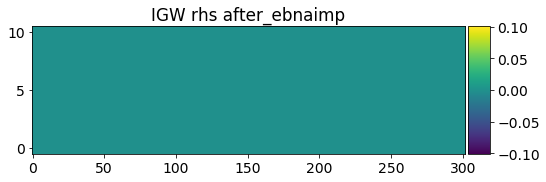

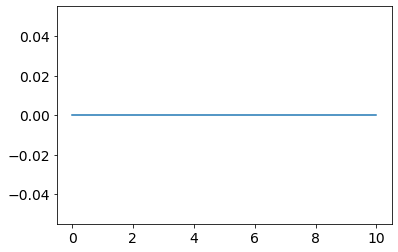

(11, 302)


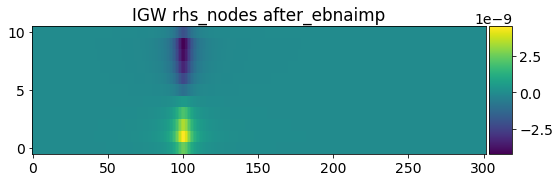

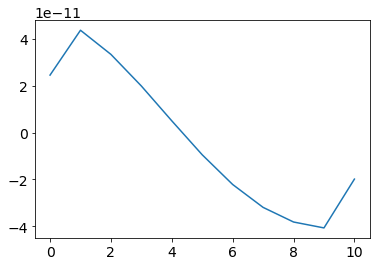

(11, 302)


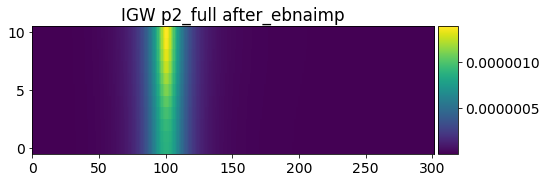

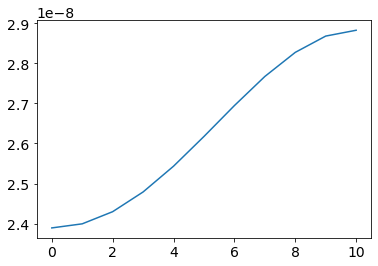

(11, 302)


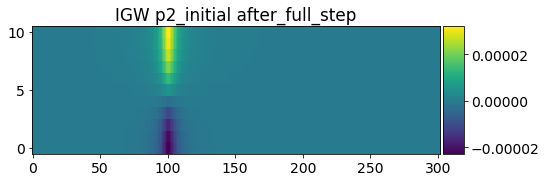

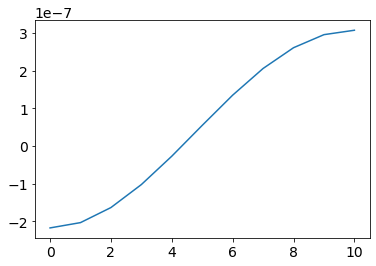

(11, 302)


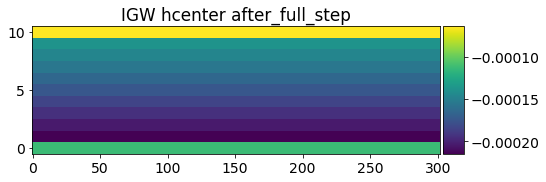

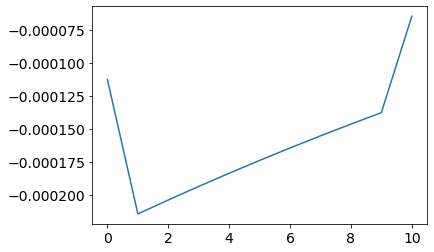

(11, 302)


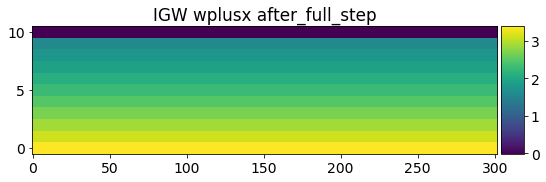

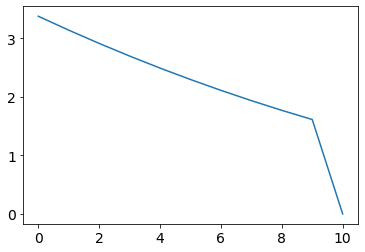

(11, 302)


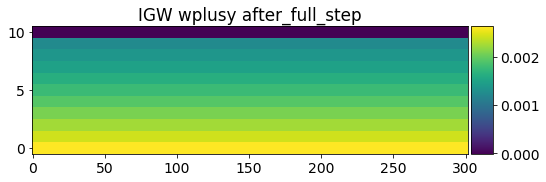

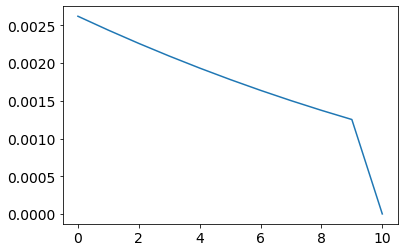

(11, 302)


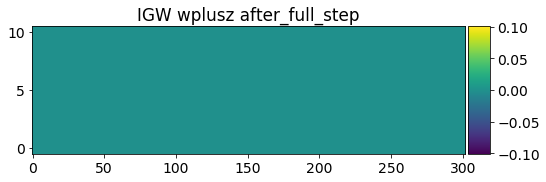

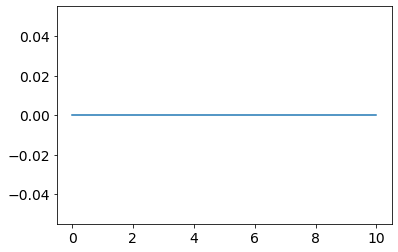

(11, 302)


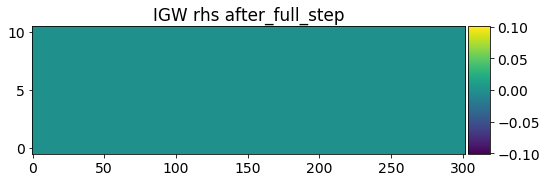

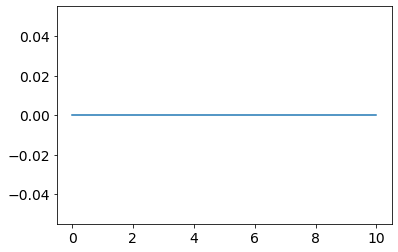

(11, 302)


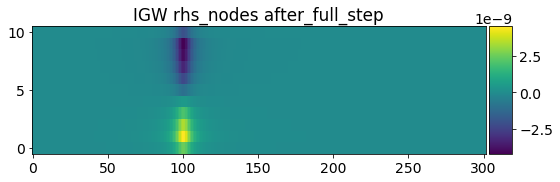

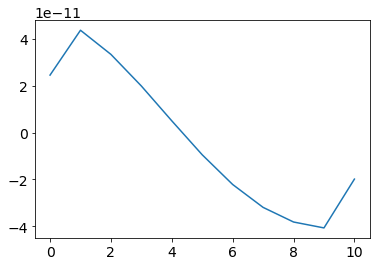

(11, 302)


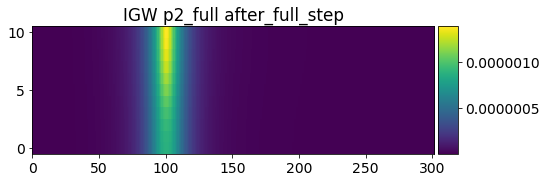

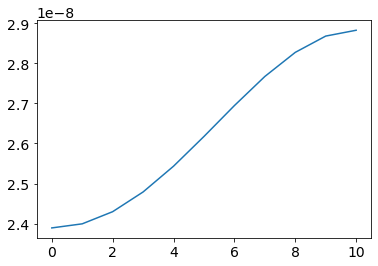

In [66]:
Nx, Ny = 301, 10
N = 1

def load(Nx,Ny,et):
    base_fn = 'output_internal_long_wave'
    pydir = '../%s/' %base_fn

    tc = utils.test_case(base_fn, pydir, Nx, Ny, et)
    tags = tc.get_tag_dict()
    
    return tc, tags

i2 = (slice(2,-2),slice(2,-2))

l_typ = 'WINDOW_STEP'
diff = False
attr_labels = pt.labels()

def get_ens(tc, times, sfx , diff, attribute):
    idx = 0 if tag is 'ic' else 1
    ens = tc.get_ensemble(times, N, attribute, sfx, label_type=l_typ, avg=True, diff=diff, tag=tag, inner=False)[idx]

    label = sfx + '_' + attribute
    return label, ens.T

sfx1 = 'planetary_nonhydro'
et = 4800.0

tc, tags = load(Nx,Ny,et)
debug_attrs = tc.get_debug_attrs()
times = [0]

# load pickled instances of data used in simulation
fn_pickle = tc.get_filename(N,sfx1,format='dat')
path_pickle = tc.get_path(fn_pickle)

file = open(path_pickle,'rb')
ud = pickle.load(file)
mpv = pickle.load(file)
dap = pickle.load(file)
elem = pickle.load(file)
file.close()

S0 = (ud.stratification(elem.y)).reshape(-1,1)

if times[0] == 0:
    ic_dict = {-1:'ic'}
    ic_dict.update(tags)
    tags = ic_dict
    
for tag in tags.values():        
    attribute = 'rho'
    _, a1 = get_ens(tc, times, sfx1, diff, attribute)
    attribute = 'rhov'
    _, a2 = get_ens(tc, times, sfx1, diff, attribute)
    attribute = 'rhoY'
    _, a3 = get_ens(tc, times, sfx1, diff, attribute)
    attribute = 'p2_nodes'
    _, a4 = get_ens(tc, times, sfx1, diff, attribute)
    
    la = 'IGW %s' %tag
    aa = a2 / a1
#     a3 = a3[i2]
#     a2 = a2[i2]
#     a1 = a1[i2]
#     aa = a3 / a1 * a3
#     aa = a3
    cexp = 0.6
    ccenter = -1.2684140000000002
#     aa = ccenter*aa**cexp
#     aa = a2 / a1
    line = aa[:,151]
#     line = 0.5*(line[1:] + line[:-1])
#     line = ccenter*line**cexp
#         aa = a3/a1 * a2 - a1
#         aa = a3 / a1
#         aa = aa[i2]
    sigma = 0.78
    # aa = gaussian_filter(aa, sigma)

    ll = [aa, la]
    pl_lst = [ll]

    pl = pt.plotter(pl_lst,ncols=1,figsize=(8,3),sharey=False)
    _ = pl.plot(method='imshow')
    
    plt.figure()
    plt.plot(line)
    plt.show()

def get_ens(tc, tag, times, sfx , diff, attribute):
#     idx = 0 if tag is 'ic' else 1
    idx = 0
    ens = tc.get_ensemble(times, N, attribute, sfx, label_type=l_typ, avg=True, diff=diff, tag=tag, inner=False, load_ic=False)[idx]
    label = sfx + '_' + attribute
    return label, ens.T

tc, tags = load(Nx,Ny,et)
debug_attrs = tc.get_debug_attrs()
times = [0]

# load pickled instances of data used in simulation
fn_pickle = tc.get_filename(N,sfx1,format='dat')
path_pickle = tc.get_path(fn_pickle)

file = open(path_pickle,'rb')
ud = pickle.load(file)
mpv = pickle.load(file)
dap = pickle.load(file)
elem = pickle.load(file)
file.close()

S0 = (ud.stratification(elem.y)).reshape(-1,1)
igs = elem.igs
dim = 1
is_periodic = False
y_idx = slice(igs[dim]-is_periodic,-igs[dim]+is_periodic-1)
right_idx = None if -igs[dim]+is_periodic == 0 else -igs[dim]+is_periodic
y_idx1 = slice(igs[dim]-is_periodic+1, right_idx) 
strat = 2.0 * (mpv.HydroState_n.Y0[y_idx1] - mpv.HydroState_n.Y0[y_idx]) / (mpv.HydroState_n.Y0[y_idx1] + mpv.HydroState_n.Y0[y_idx]) / elem.dy

plt.figure()
plt.plot(strat)
plt.title('strat')
plt.show()

if times[0] == 0:
    ic_dict = {-1:'ic'}
    ic_dict.update(tags)
    tags = ic_dict
    
for tag in tags.values():
    if tag == 'after_ebnaimp' or tag == 'after_full_step':
        for attribute in debug_attrs.values():
            _, a1 = get_ens(tc, tag, times, sfx1, diff, attribute)

            la = 'IGW %s %s' %(attribute,tag)
            aa = a1
            aa = aa[i2]

            ll = [aa, la]
            pl_lst = [ll]
            line = aa[:,151]        

            pl = pt.plotter(pl_lst,ncols=1,figsize=(8,3),sharey=False)
            _ = pl.plot(method='imshow')
            print(aa.shape)
            
            plt.figure()
            plt.plot(line)
            plt.show()

In [74]:
A = np.arange(0,25).reshape(5,5)
# A[:,-1]

a = -1
print(A[:,a])

[ 4  9 14 19 24]
